In [1]:
#importing initial packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import xgboost as xgb

# Reading the dataset

In [2]:
#reading the data and keeping the index as the date and time

data = pd.read_csv('Turbine_Data.csv', parse_dates=['Unnamed: 0'],index_col=['Unnamed: 0'])
data.index = pd.to_datetime(data.index)

In [3]:
data.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [4]:
data.drop_duplicates(inplace=True)

In [5]:
data.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2018-01-01 00:00:00+00:00,-5.357727,23.148729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.000000,-9.960830,NaN,NaN,G01,8.000000,2.279088
2018-01-01 00:10:00+00:00,-5.822360,23.039754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,300.428571,-9.628441,NaN,NaN,G01,300.428571,2.339343
2018-01-01 00:20:00+00:00,-5.279409,22.948703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,340.000000,-9.491235,NaN,NaN,G01,340.000000,2.455610
2018-01-01 00:30:00+00:00,-4.648054,22.966851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,345.000000,-9.856136,NaN,NaN,G01,345.000000,2.026754


In [6]:
data.shape

(95185, 21)

In [7]:
data.nunique()

ActivePower                     94084
AmbientTemperatue               93678
BearingShaftTemperature         62286
Blade1PitchAngle                38946
Blade2PitchAngle                39021
Blade3PitchAngle                39021
ControlBoxTemperature               1
GearboxBearingTemperature       62313
GearboxOilTemperature           62412
GeneratorRPM                    61074
GeneratorWinding1Temperature    62406
GeneratorWinding2Temperature    62424
HubTemperature                  38119
MainBoxTemperature              49145
NacellePosition                  6664
ReactivePower                   94040
RotorRPM                        59254
TurbineStatus                     353
WTG                                 1
WindDirection                    6664
WindSpeed                       94224
dtype: int64

In [8]:
data.drop(['ControlBoxTemperature','WTG'], axis=1, inplace=True)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ActivePower,94624.0,619.036994,610.917748,-38.524659,80.098952,402.880706,1073.979105,1.779032e+03
AmbientTemperatue,93698.0,28.777569,4.358470,0.000000,25.625603,28.338961,31.665910,4.240560e+01
BearingShaftTemperature,62380.0,43.105338,5.168850,0.000000,39.856871,42.927465,47.018075,5.508866e+01
Blade1PitchAngle,41987.0,9.751759,20.646533,-43.156734,-0.939896,0.395038,8.101939,9.014361e+01
Blade2PitchAngle,41882.0,10.038709,20.272100,-26.443415,-0.433316,0.889782,8.481306,9.001783e+01
Blade3PitchAngle,41882.0,10.038709,20.272100,-26.443415,-0.433316,0.889782,8.481306,9.001783e+01
GearboxBearingTemperature,62402.0,64.376222,10.020754,0.000000,57.925129,64.862406,71.104401,8.223793e+01
GearboxOilTemperature,62430.0,57.561706,6.324124,0.000000,53.944023,57.197064,61.307270,7.076458e+01
GeneratorRPM,62287.0,1102.146658,527.967896,0.000000,1029.812895,1124.930500,1515.517020,1.809942e+03
GeneratorWinding1Temperature,62419.0,72.462897,22.626685,0.000000,55.492241,65.792061,85.874609,1.267730e+02


In [19]:
data.isnull().sum()

ActivePower                       561
AmbientTemperatue                1487
BearingShaftTemperature         32805
Blade1PitchAngle                53198
Blade2PitchAngle                53303
Blade3PitchAngle                53303
GearboxBearingTemperature       32783
GearboxOilTemperature           32755
GeneratorRPM                    32898
GeneratorWinding1Temperature    32766
GeneratorWinding2Temperature    32744
HubTemperature                  32917
MainBoxTemperature              32816
NacellePosition                 23077
ReactivePower                     563
RotorRPM                        33066
TurbineStatus                   32426
WindDirection                   23077
WindSpeed                         716
dtype: int64

In [21]:
data.shape

(95185, 19)

In [22]:
data =  data[data['ActivePower']>=0]

In [23]:
data.shape

(78989, 19)

In [24]:
data.isna().sum()

ActivePower                         0
AmbientTemperatue                1032
BearingShaftTemperature         26821
Blade1PitchAngle                43282
Blade2PitchAngle                43365
Blade3PitchAngle                43365
GearboxBearingTemperature       26819
GearboxOilTemperature           26806
GeneratorRPM                    26810
GeneratorWinding1Temperature    26792
GeneratorWinding2Temperature    26785
HubTemperature                  26930
MainBoxTemperature              26841
NacellePosition                 20429
ReactivePower                      42
RotorRPM                        26816
TurbineStatus                   26466
WindDirection                   20429
WindSpeed                         308
dtype: int64

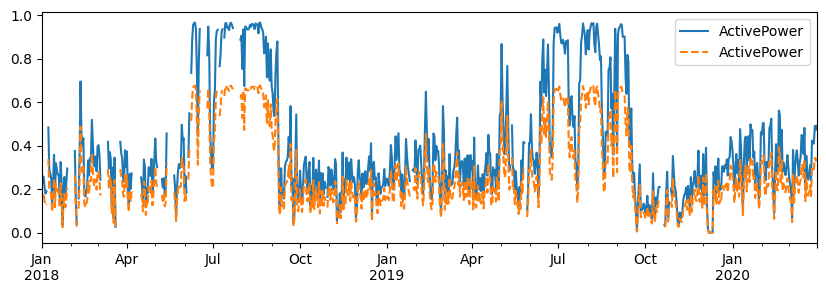

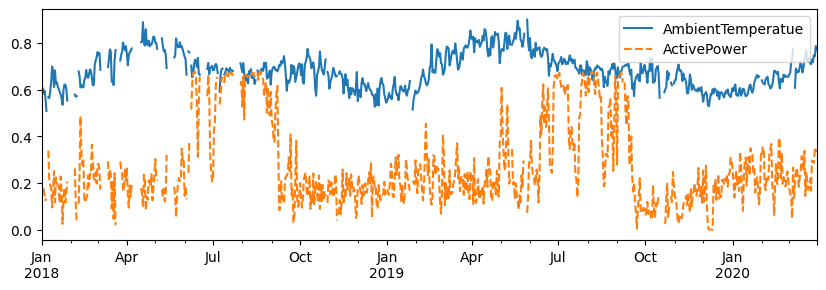

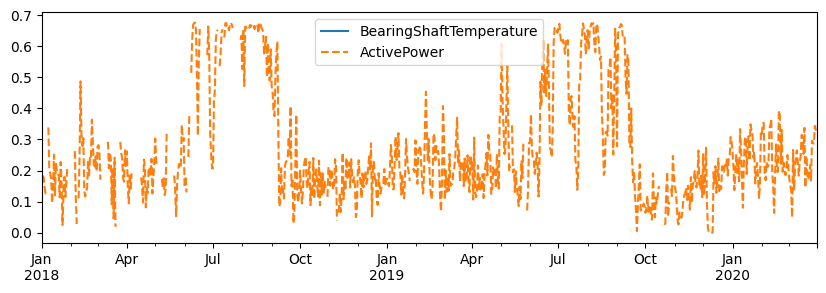

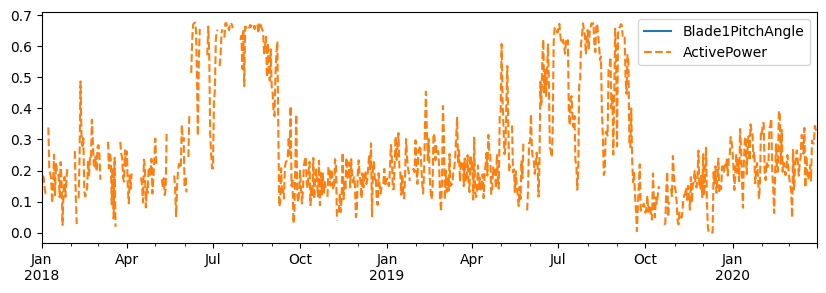

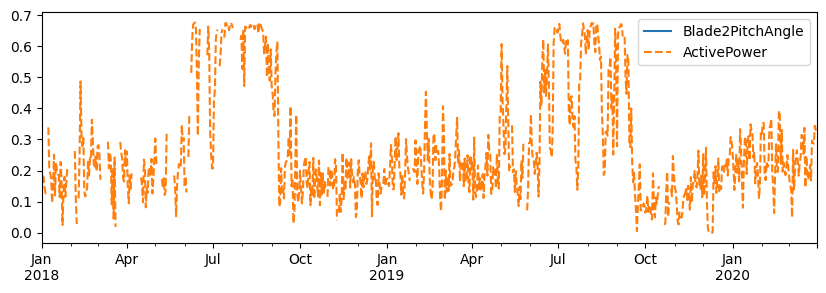

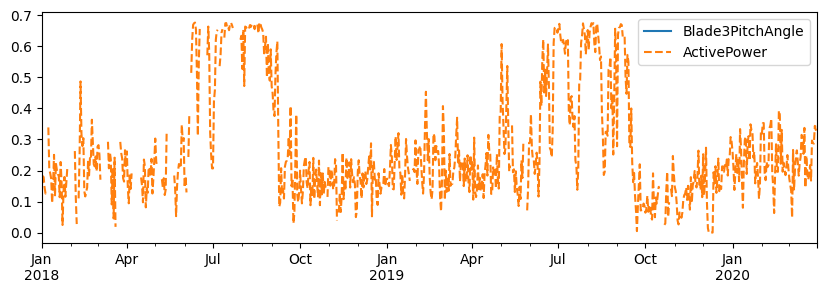

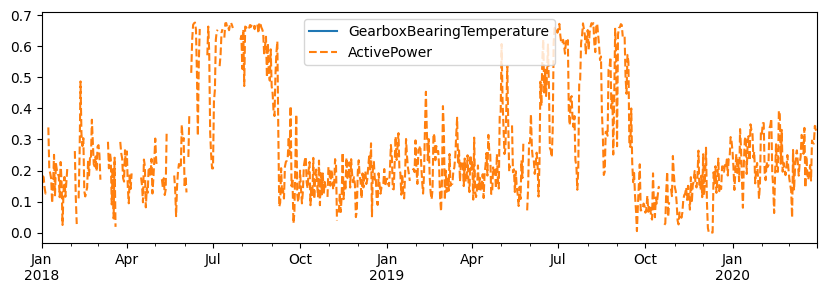

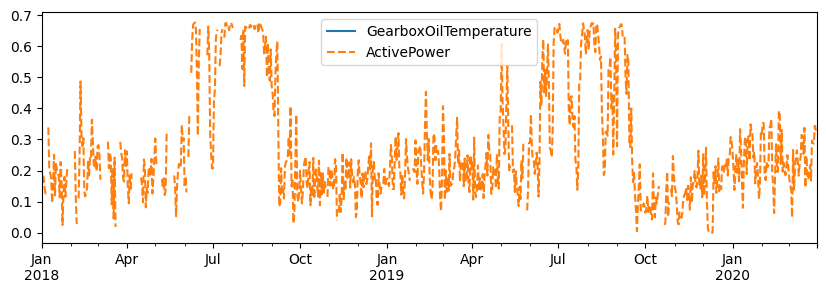

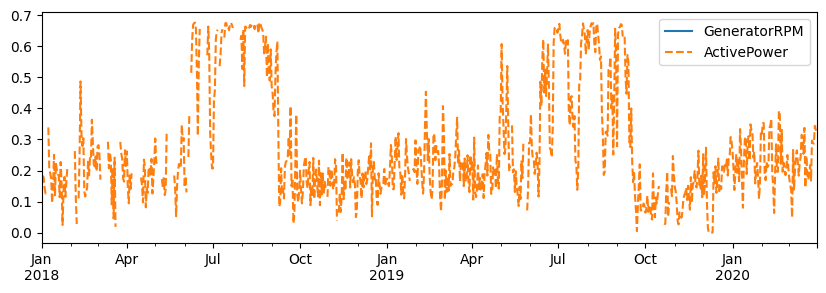

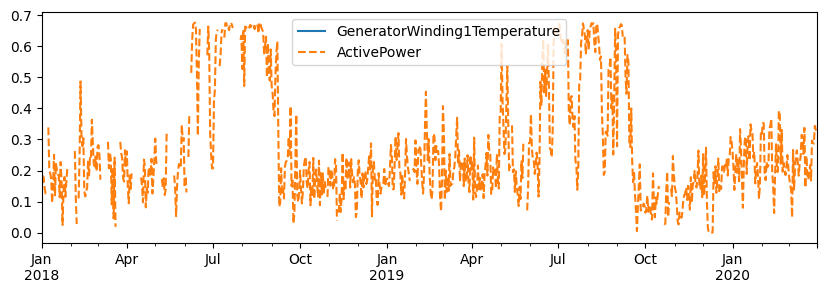

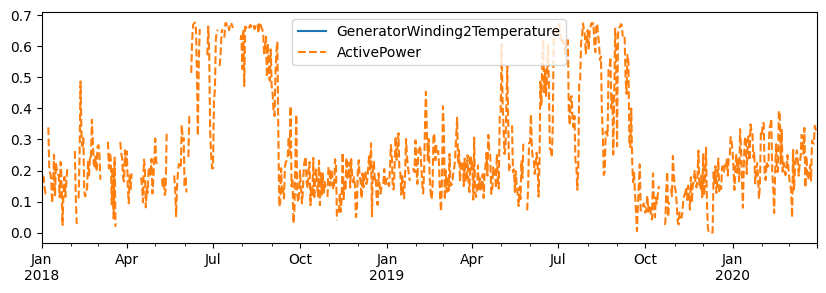

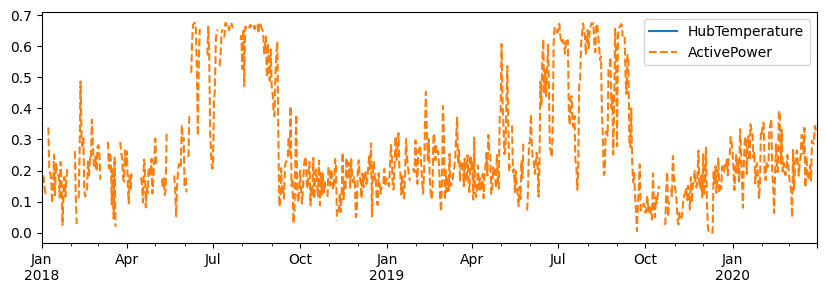

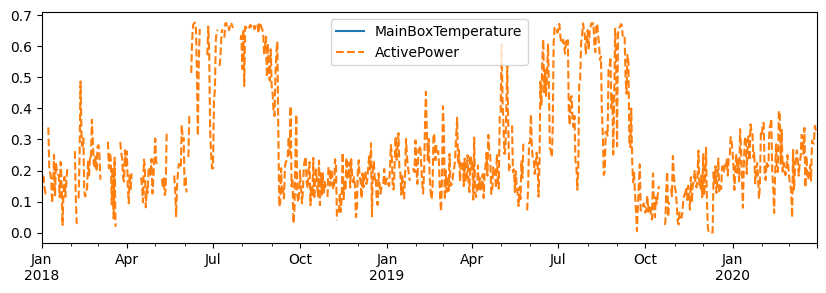

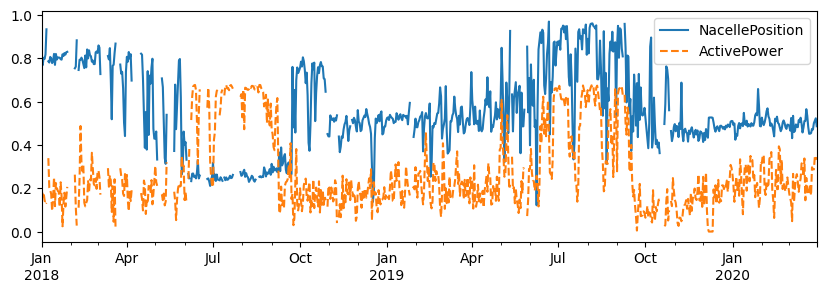

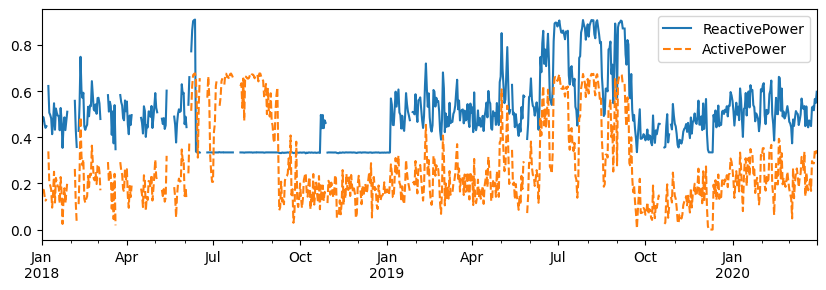

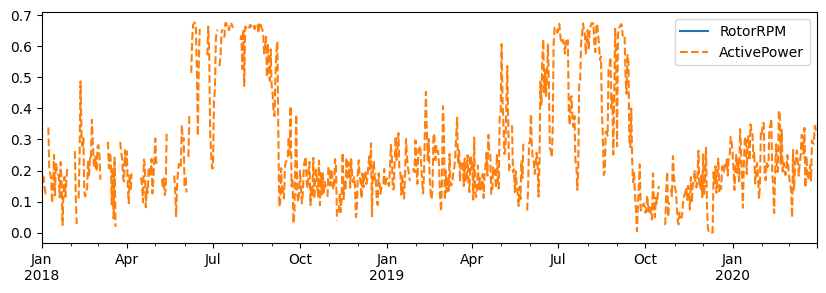

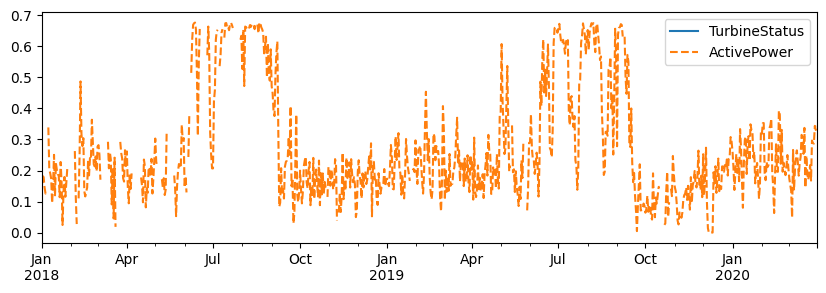

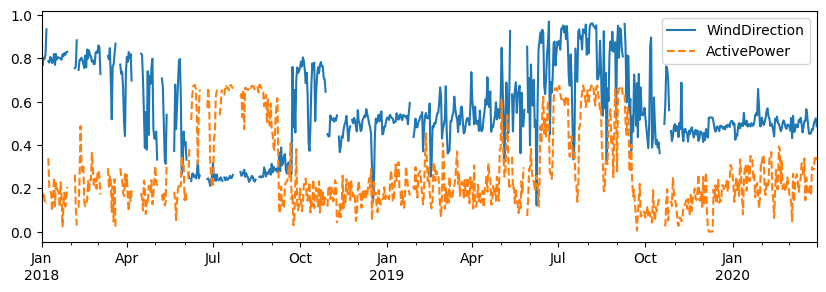

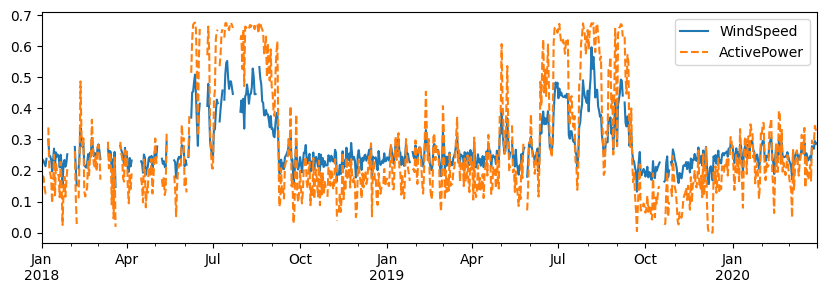

In [25]:
#data visualization
d2 = data.copy()
for i in data:
    ## normalising data using min max scaling so it can be compared
    mini = min(d2[i])
    maxi = max(d2[i])
    d2[i] = (d2[i]- mini)/(maxi-mini)
    
    plt.figure(figsize=(10,3))
    d2[i].resample('D').mean().plot(legend=i) #resamples data in daily intervals
    (d2['ActivePower']*0.7).resample('D').mean().plot(style='--', legend='ActivePower')
    plt.legend()
    plt.show()

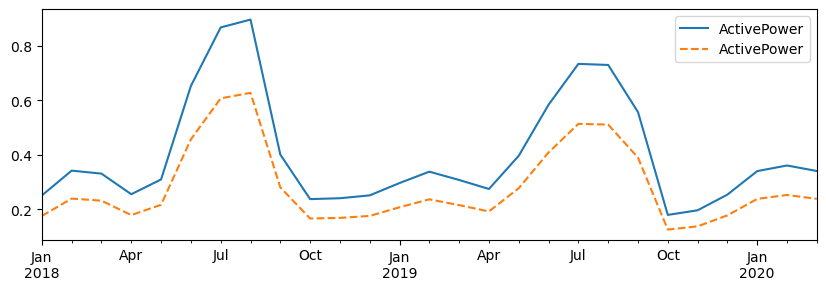

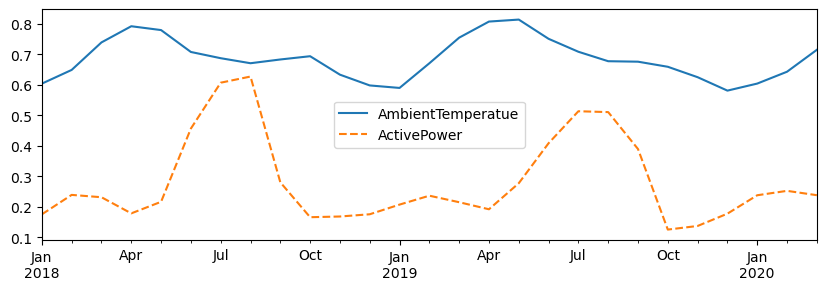

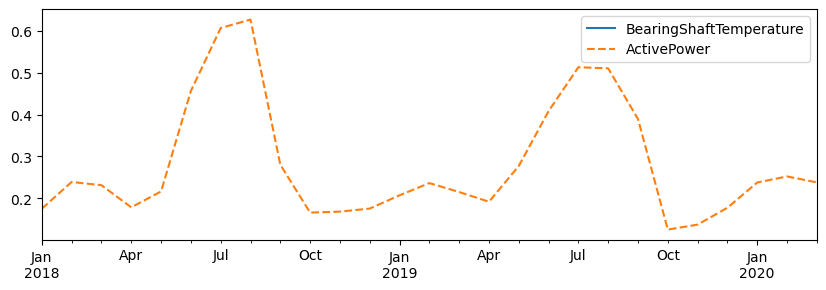

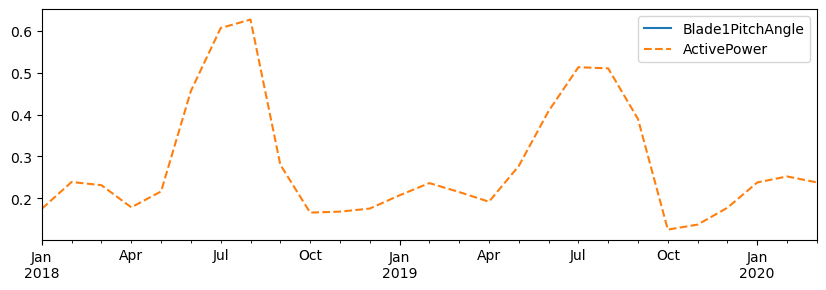

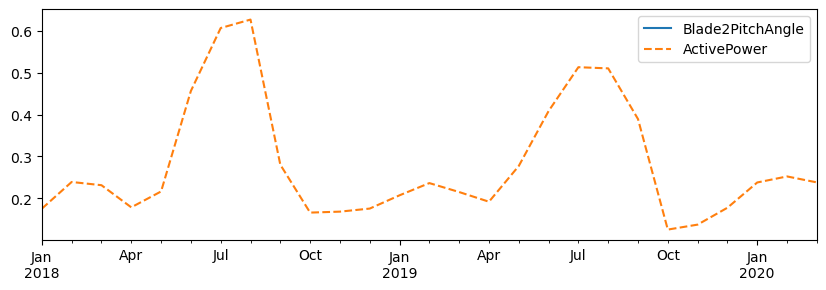

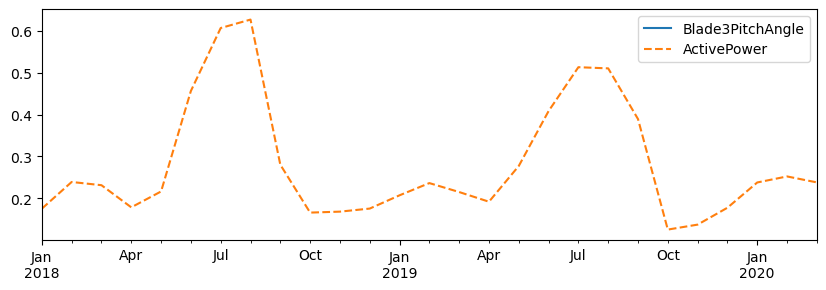

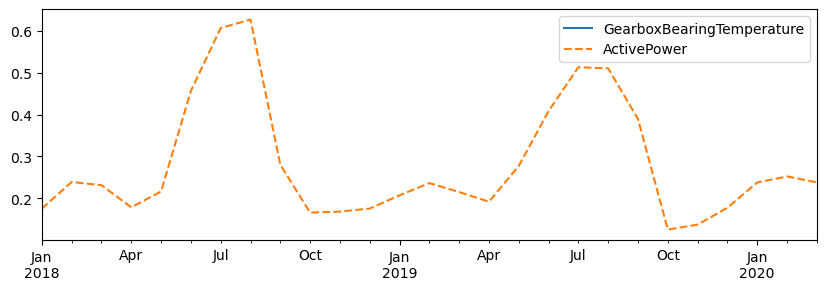

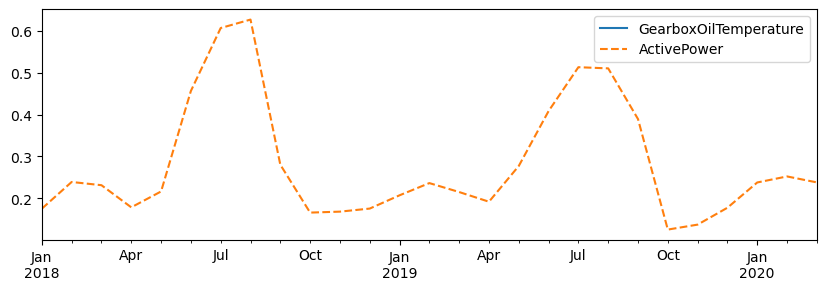

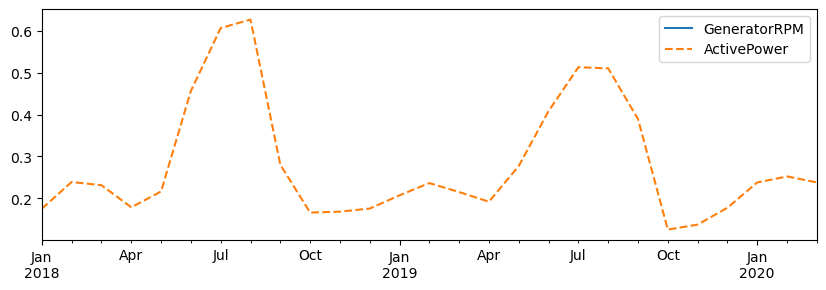

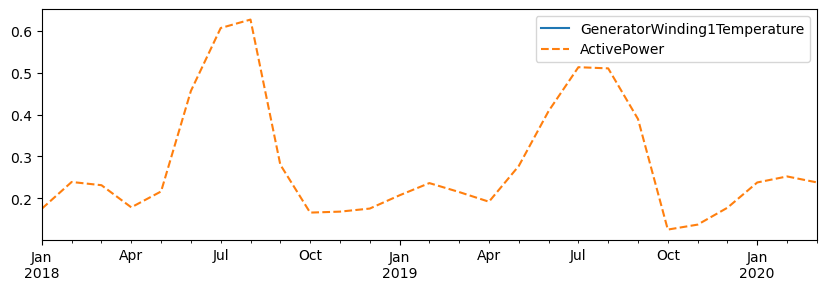

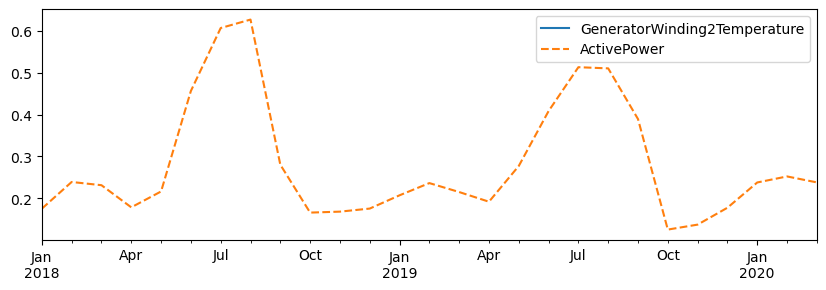

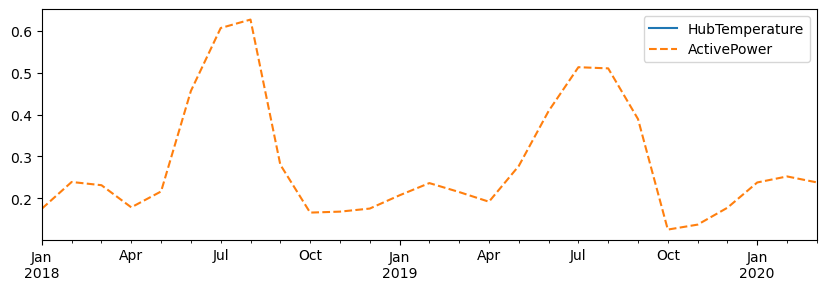

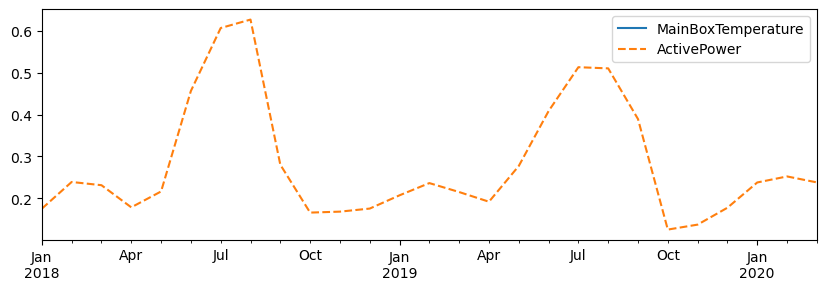

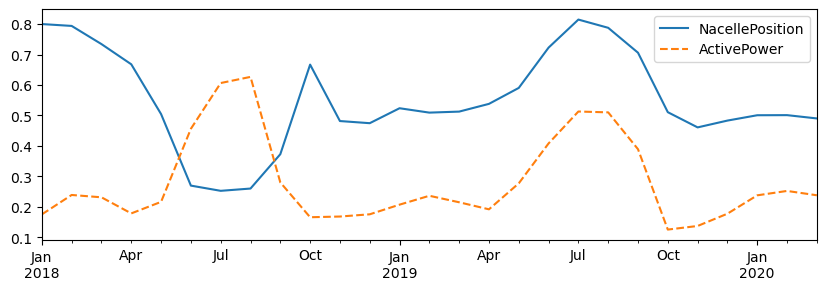

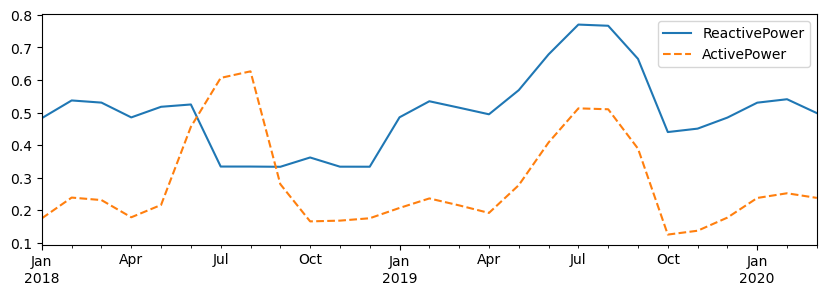

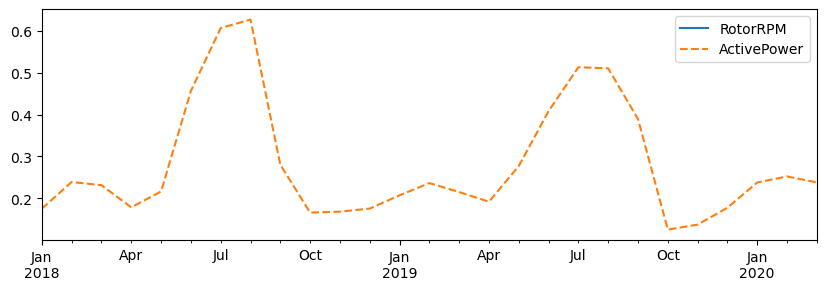

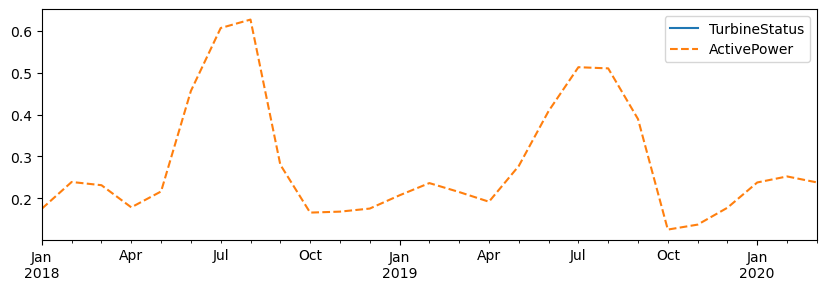

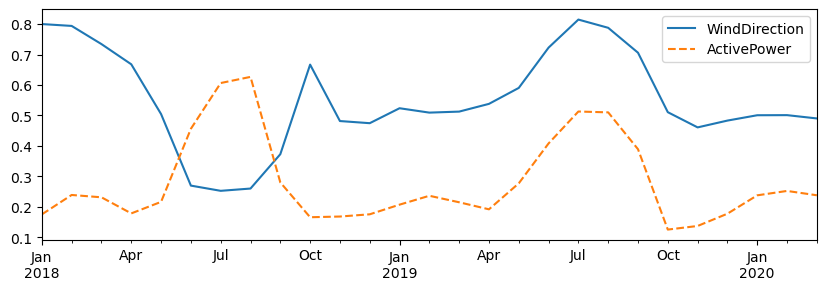

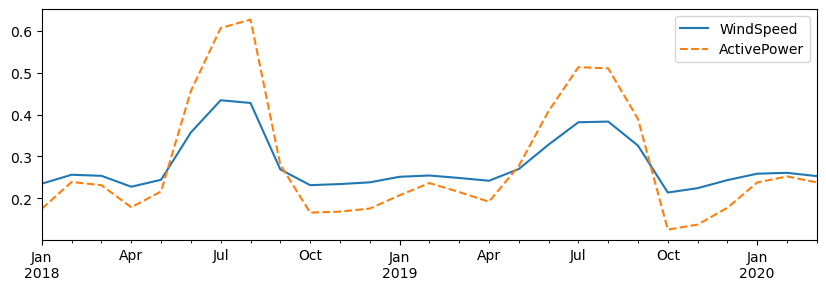

In [16]:
for i in data:

    
    plt.figure(figsize=(10,3))
    d2[i].resample('M').mean().plot(legend=i)
    (d2['ActivePower']*0.7).resample('M').mean().plot(style='--', legend='ActivePower')
    plt.legend()
    plt.show()

<AxesSubplot:>

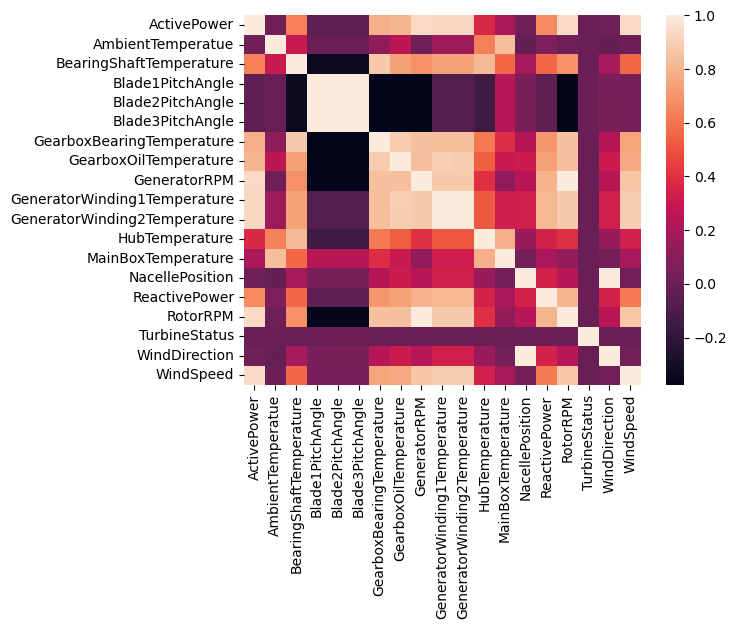

In [17]:
sns.heatmap(data.corr())

In [18]:
correlations = data.corr().unstack().sort_values(ascending=False) 

# checking  ActivePower correlations
correlations['ActivePower'].drop_duplicates()

ActivePower                     1.000000
WindSpeed                       0.937870
RotorRPM                        0.935928
GeneratorRPM                    0.934303
GeneratorWinding2Temperature    0.928769
GeneratorWinding1Temperature    0.927517
GearboxOilTemperature           0.801319
GearboxBearingTemperature       0.786150
ReactivePower                   0.662808
BearingShaftTemperature         0.631922
HubTemperature                  0.372788
MainBoxTemperature              0.207514
NacellePosition                 0.024547
AmbientTemperatue               0.019064
TurbineStatus                  -0.001115
Blade1PitchAngle               -0.042637
Blade3PitchAngle               -0.042700
dtype: float64

In [19]:
data = data[['ActivePower','WindSpeed']]
data.dropna()

,ActivePower,WindSpeed
2018-01-01 06:20:00+00:00,26.212347,3.042750
2018-01-01 06:40:00+00:00,59.632658,3.424814
2018-01-01 06:50:00+00:00,40.889650,3.507172
2018-01-01 10:40:00+00:00,34.398111,3.442212
2018-01-01 12:00:00+00:00,29.797653,3.031363
...,...,...
2020-03-30 23:10:00+00:00,70.044465,3.533445
2020-03-30 23:20:00+00:00,40.833474,3.261231
2020-03-30 23:30:00+00:00,20.777790,3.331839
2020-03-30 23:40:00+00:00,62.091039,3.284468


In [20]:
len(data)

78989

In [21]:
X_train, X_test, y_train,y_test = data['WindSpeed'][0:78000], data['WindSpeed'][78000:], data['ActivePower'][0:78000],  data['ActivePower'][78000:]
len(X_train),len(X_test),len(y_train),len(y_test)

(78000, 989, 78000, 989)

In [22]:
model = xgb.XGBRegressor(n_estimators = 200) #high estimator = more tree depth

In [23]:
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
          early_stopping_rounds=50,verbose=True) #earlystop if loss no changing it will stop at 50

[0]	validation_0-rmse:669.43821	validation_1-rmse:630.97751
[1]	validation_0-rmse:472.49579	validation_1-rmse:452.89587
[2]	validation_0-rmse:336.13153	validation_1-rmse:329.72468
[3]	validation_0-rmse:242.74571	validation_1-rmse:245.43169
[4]	validation_0-rmse:180.03659	validation_1-rmse:188.71965
[5]	validation_0-rmse:139.27392	validation_1-rmse:151.41368
[6]	validation_0-rmse:114.02339	validation_1-rmse:127.56200
[7]	validation_0-rmse:99.26300	validation_1-rmse:112.70993


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:91.07498	validation_1-rmse:103.68065
[9]	validation_0-rmse:86.73375	validation_1-rmse:98.22847
[10]	validation_0-rmse:84.49390	validation_1-rmse:94.86728
[11]	validation_0-rmse:83.32267	validation_1-rmse:92.74012
[12]	validation_0-rmse:82.74173	validation_1-rmse:91.44646
[13]	validation_0-rmse:82.41217	validation_1-rmse:90.57885
[14]	validation_0-rmse:82.22690	validation_1-rmse:90.03059
[15]	validation_0-rmse:82.03695	validation_1-rmse:89.61250
[16]	validation_0-rmse:81.96316	validation_1-rmse:89.42618
[17]	validation_0-rmse:81.64794	validation_1-rmse:89.25802
[18]	validation_0-rmse:81.60770	validation_1-rmse:89.08230
[19]	validation_0-rmse:81.56097	validation_1-rmse:89.10996
[20]	validation_0-rmse:81.54522	validation_1-rmse:89.03032
[21]	validation_0-rmse:81.48808	validation_1-rmse:89.06395
[22]	validation_0-rmse:81.42692	validation_1-rmse:89.04206
[23]	validation_0-rmse:81.40540	validation_1-rmse:88.99296
[24]	validation_0-rmse:81.04003	validation_1-rmse:88.9883

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [24]:
pred = model.predict(X_test)

In [25]:
df_final = pd.DataFrame(data={'Actuals':y_test, 'Predictions':pred })  

In [26]:
from sklearn.metrics import *
print('The Coefficient of determination (R-squared) = {:.3f}'.format(r2_score(df_final['Actuals'],df_final['Predictions'])))
print('The mean absolute error (MAE)                = {:.2f}'.format(mean_absolute_error(df_final['Actuals'],df_final['Predictions'])))
print('The RMSE error (RMSE)                        = {:.2f}'.format(mean_squared_error(df_final['Actuals'],df_final['Predictions'],squared=False)))
print('The Mean absolute percentage error (MAPE)    = {:.3f}'.format(mean_absolute_percentage_error(df_final['Actuals'],df_final['Predictions'])))  

The Coefficient of determination (R-squared) = 0.970
The mean absolute error (MAE)                = 63.13
The RMSE error (RMSE)                        = 88.84
The Mean absolute percentage error (MAPE)    = 0.476


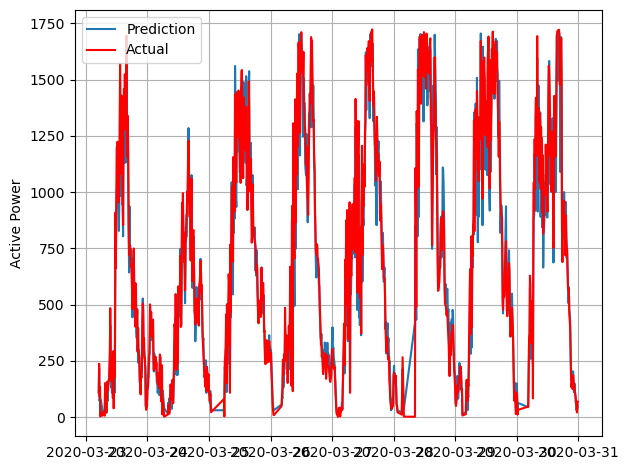

In [27]:
plt.plot(df_final['Predictions'],label='Prediction')
plt.plot(df_final['Actuals'], color='red',label='Actual')

plt.ylabel('Active Power')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

<AxesSubplot:ylabel='ActivePower'>

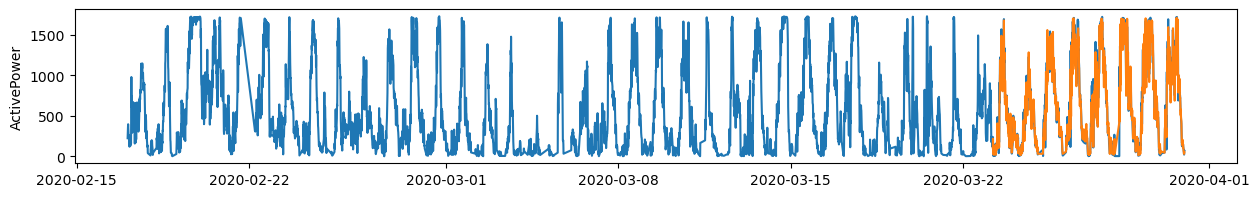

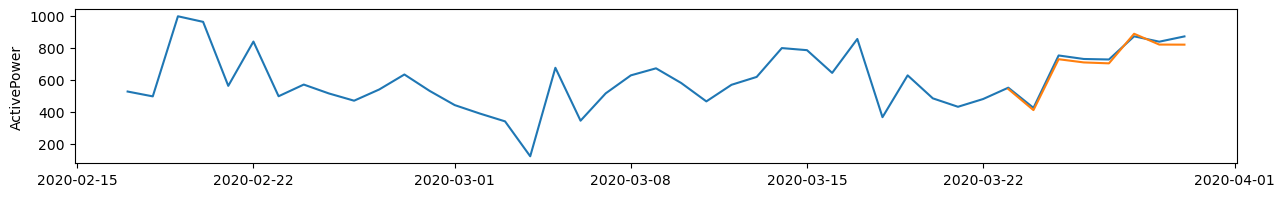

In [29]:
plt.figure(figsize=(15,2))
sns.lineplot(data = data['ActivePower'][74000:])
sns.lineplot(data = df_final['Predictions'])

plt.figure(figsize=(15,2))
sns.lineplot(data = data['ActivePower'][74000:].resample('D').mean())
sns.lineplot(data = df_final['Predictions'].resample('D').mean())

# New test only dates as features

In [30]:
data.tail()

,ActivePower,WindSpeed
2020-03-30 23:10:00+00:00,70.044465,3.533445
2020-03-30 23:20:00+00:00,40.833474,3.261231
2020-03-30 23:30:00+00:00,20.777790,3.331839
2020-03-30 23:40:00+00:00,62.091039,3.284468
2020-03-30 23:50:00+00:00,68.664425,3.475205


In [31]:
new = pd.date_range('2020-04-01 12:00:00+00:00','2020-06-01 12:00:00+00:00', freq='10min') #creating new data
new = pd.DataFrame(index=new)

In [32]:
len(new)

8785

In [33]:
def create_f(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['minute'] = df.index.minute
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week
    
    return df

In [34]:
data2 = data.copy()
data2 = create_f(data2)

In [35]:
data2.head()

,ActivePower,WindSpeed,hour,minute,day,month,year,dayofweek,dayofyear,weekofyear
2018-01-01 06:20:00+00:00,26.212347,3.042750,6,20,1,1,2018,0,1,1
2018-01-01 06:40:00+00:00,59.632658,3.424814,6,40,1,1,2018,0,1,1
2018-01-01 06:50:00+00:00,40.889650,3.507172,6,50,1,1,2018,0,1,1
2018-01-01 10:40:00+00:00,34.398111,3.442212,10,40,1,1,2018,0,1,1
2018-01-01 12:00:00+00:00,29.797653,3.031363,12,0,1,1,2018,0,1,1


In [36]:
data2.columns

Index(['ActivePower', 'WindSpeed', 'hour', 'minute', 'day', 'month', 'year',
       'dayofweek', 'dayofyear', 'weekofyear'],
      dtype='object')

In [37]:
data2.isna().sum()
data2 = data2.dropna()

In [38]:
features = ['hour', 'minute', 'day', 'month', 'year','dayofweek', 'dayofyear']
label = 'ActivePower'
X_train, X_test, y_train,y_test = data2[features][0:78000], data2[features][78000:], data2[label][0:78000],  data2[label][78000:]
len(X_train),len(X_test),len(y_train),len(y_test)

(78000, 681, 78000, 681)

In [39]:
model2 = xgb.XGBRegressor(n_estimators = 1000,learning_rate=0.01)
model2.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
          early_stopping_rounds=50,verbose=True) 

[0]	validation_0-rmse:939.67225	validation_1-rmse:945.87244
[1]	validation_0-rmse:931.87864	validation_1-rmse:941.88671
[2]	validation_0-rmse:924.17594	validation_1-rmse:937.94857
[3]	validation_0-rmse:916.55866	validation_1-rmse:933.67564
[4]	validation_0-rmse:909.03092	validation_1-rmse:929.83594
[5]	validation_0-rmse:901.58205	validation_1-rmse:925.58036
[6]	validation_0-rmse:894.21682	validation_1-rmse:921.37492
[7]	validation_0-rmse:886.95871	validation_1-rmse:917.21912
[8]	validation_0-rmse:879.75955	validation_1-rmse:912.95882
[9]	validation_0-rmse:872.69263	validation_1-rmse:908.74805


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:865.71019	validation_1-rmse:904.58635
[11]	validation_0-rmse:858.78344	validation_1-rmse:901.06352
[12]	validation_0-rmse:851.92258	validation_1-rmse:896.99494
[13]	validation_0-rmse:845.14439	validation_1-rmse:892.97386
[14]	validation_0-rmse:838.45226	validation_1-rmse:889.15303
[15]	validation_0-rmse:831.83522	validation_1-rmse:885.22593
[16]	validation_0-rmse:825.29864	validation_1-rmse:881.34473
[17]	validation_0-rmse:818.84069	validation_1-rmse:877.50900
[18]	validation_0-rmse:812.47475	validation_1-rmse:874.28597
[19]	validation_0-rmse:806.17193	validation_1-rmse:870.38947
[20]	validation_0-rmse:799.94567	validation_1-rmse:866.53820
[21]	validation_0-rmse:793.76244	validation_1-rmse:862.87810
[22]	validation_0-rmse:787.68740	validation_1-rmse:859.11554
[23]	validation_0-rmse:781.65159	validation_1-rmse:855.54195
[24]	validation_0-rmse:775.72748	validation_1-rmse:852.58948
[25]	validation_0-rmse:769.83309	validation_1-rmse:848.95375
[26]	validation_0-rmse:7

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [40]:
pred = model2.predict(X_test)

In [41]:
df_final2 = pd.DataFrame(data={'Actuals':y_test, 'Predictions':pred})  

In [42]:
from sklearn.metrics import *
print('The Coefficient of determination (R-squared) = {:.3f}'.format(r2_score(df_final2['Actuals'],df_final2['Predictions'])))
print('The mean absolute error (MAE)                = {:.2f}'.format(mean_absolute_error(df_final2['Actuals'],df_final2['Predictions'])))
print('The RMSE error (RMSE)                        = {:.2f}'.format(mean_squared_error(df_final2['Actuals'],df_final2['Predictions'],squared=False)))
print('The Mean absolute percentage error (MAPE)    = {:.3f}'.format(mean_absolute_percentage_error(df_final2['Actuals'],df_final2['Predictions'])))  

The Coefficient of determination (R-squared) = -0.042
The mean absolute error (MAE)                = 409.57
The RMSE error (RMSE)                        = 541.83
The Mean absolute percentage error (MAPE)    = 2.201


<AxesSubplot:ylabel='ActivePower'>

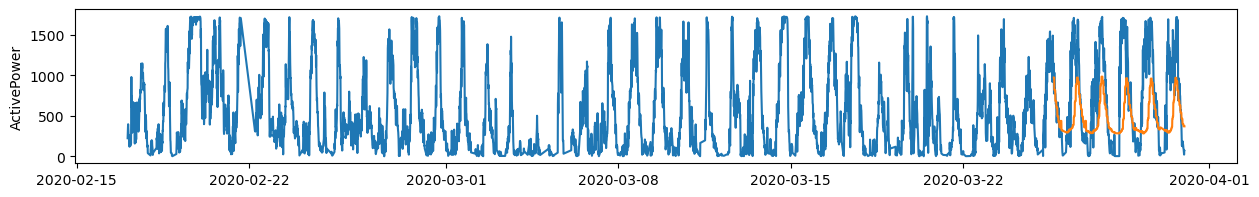

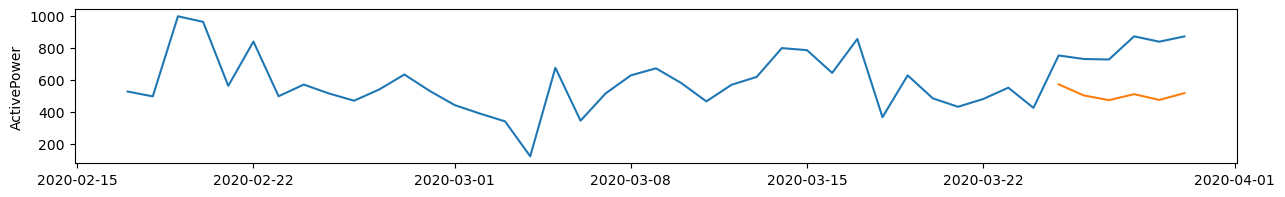

In [43]:
plt.figure(figsize=(15,2))
sns.lineplot(data = data[label][74000:])
sns.lineplot(data = df_final2['Predictions'])

plt.figure(figsize=(15,2))
sns.lineplot(data = data[label][74000:].resample('D').mean())
sns.lineplot(data = df_final2['Predictions'].resample('D').mean())

In [44]:
new = create_f(new)
print(new[features].head())
fut = model2.predict(new[features])
future = pd.DataFrame(data={'Predictions':fut}, index = new.index)  

                           hour  minute  day  month  year  dayofweek  \
2020-04-01 12:00:00+00:00    12       0    1      4  2020          2   
2020-04-01 12:10:00+00:00    12      10    1      4  2020          2   
2020-04-01 12:20:00+00:00    12      20    1      4  2020          2   
2020-04-01 12:30:00+00:00    12      30    1      4  2020          2   
2020-04-01 12:40:00+00:00    12      40    1      4  2020          2   

                           dayofyear  
2020-04-01 12:00:00+00:00         92  
2020-04-01 12:10:00+00:00         92  
2020-04-01 12:20:00+00:00         92  
2020-04-01 12:30:00+00:00         92  
2020-04-01 12:40:00+00:00         92  


<AxesSubplot:ylabel='ActivePower'>

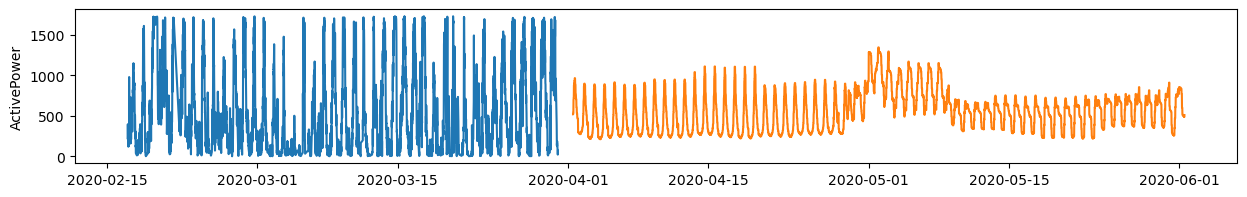

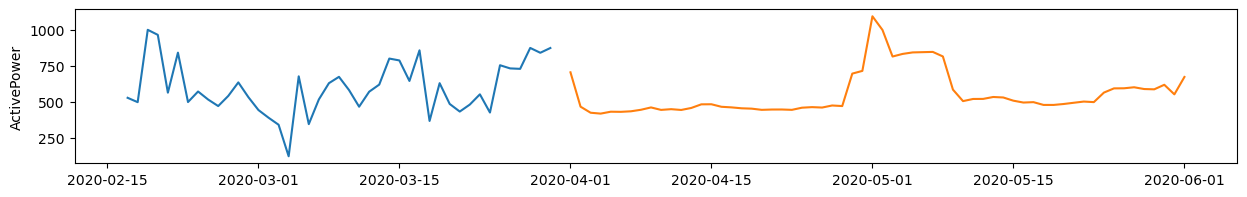

In [45]:
plt.figure(figsize=(15,2))
sns.lineplot(data = data[label][74000:])
sns.lineplot(data = future['Predictions'])

plt.figure(figsize=(15,2))
sns.lineplot(data = data[label][74000:].resample('D').mean())
sns.lineplot(data = future['Predictions'].resample('D').mean())

# saving the models

In [46]:
import pickle
file_name = "model2.pkl"
#model.save_model('model1.json')
pickle.dump(model2, open(file_name, "wb"))
